In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data
df=pd.read_csv(r'C:\Users\Admin\Desktop\Viska\Machine Learning\Day13-18_may-24/Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
df.shape

(164, 8)

In [5]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [6]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [7]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [8]:
#checking missing values
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [9]:
#Lable incoding 


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Education']=le.fit_transform(df['Education'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['Home Ownership']=le.fit_transform(df['Home Ownership'])

Separate input & Output labels


In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

coverting data in train & test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [14]:
x_train.shape


(114, 7)

In [15]:
x_test.shape

(50, 7)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.77593283, -1.05409255,  0.90243185, -0.73865505, -0.98260737,
         2.66391337, -0.66561098],
       [ 1.49704432,  0.9486833 ,  1.5267816 , -0.73865505, -0.98260737,
        -0.69792564, -0.66561098],
       [ 0.77593283, -1.05409255,  0.74634441, -0.73865505, -0.98260737,
         2.66391337, -0.66561098],
       [-0.5461049 ,  0.9486833 , -1.20474857, -1.45227095,  1.01770049,
        -0.69792564,  1.50237907],
       [-1.50758688, -1.05409255, -1.43887973, -1.45227095,  1.01770049,
        -0.69792564,  1.50237907],
       [ 0.65574758,  0.9486833 , -0.34626766,  1.40219264,  1.01770049,
        -0.69792564, -0.66561098],
       [ 0.41537709,  0.9486833 ,  0.59025697,  1.40219264,  1.01770049,
        -0.69792564, -0.66561098],
       [-0.90666064,  0.9486833 , -0.65844254, -0.73865505,  1.01770049,
        -0.69792564,  1.50237907],
       [ 0.29519184,  0.9486833 ,  0.74634441, -0.02503915,  1.01770049,
        -0.69792564, -0.66561098],
       [-1.38740164, -1.0540

Model creation: KNN Method
n = 7
5 - low
2 - avg 
0 - high

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array(['Average', 'High', 'High', 'High', 'High', 'Average', 'High',
       'High', 'High', 'High', 'Average', 'Low', 'High', 'High', 'Low',
       'High', 'Average', 'Low', 'High', 'High', 'High', 'Average', 'Low',
       'High', 'High', 'High', 'High', 'High', 'Average', 'Average',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Average',
       'High', 'Average', 'High', 'Average', 'Low', 'Average', 'High',
       'Average', 'High', 'High', 'High', 'Average'], dtype=object)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
    matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[ 9  2  0]
 [ 2 30  0]
 [ 2  0  5]]


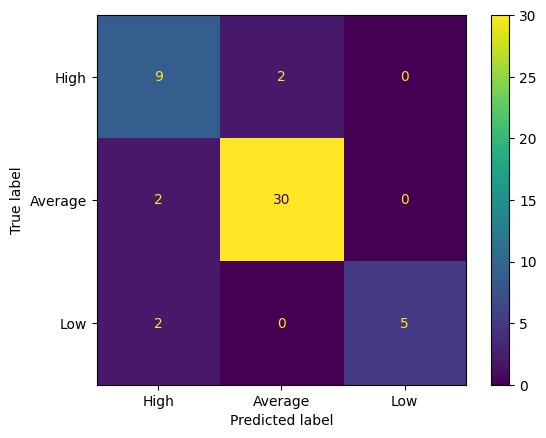

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=['High','Average','Low']
cmd=ConfusionMatrixDisplay(matrix,display_labels=labels)
cmd.plot()

In [20]:
from sklearn.svm import SVC
vm=SVC()
vm.fit(x_train,y_train)
y_preddd=vm.predict(x_test)
y_preddd

array(['Average', 'High', 'High', 'High', 'High', 'Average', 'High',
       'High', 'High', 'High', 'Average', 'Low', 'High', 'High', 'Low',
       'High', 'Average', 'Low', 'High', 'High', 'High', 'Average', 'Low',
       'High', 'High', 'High', 'High', 'High', 'High', 'Average', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Average', 'High',
       'Average', 'High', 'Average', 'Low', 'Average', 'High', 'Average',
       'High', 'High', 'High', 'Average'], dtype=object)

In [21]:
matrixxx=confusion_matrix(y_test,y_preddd)
print(matrixxx)

[[ 9  2  0]
 [ 1 31  0]
 [ 2  0  5]]


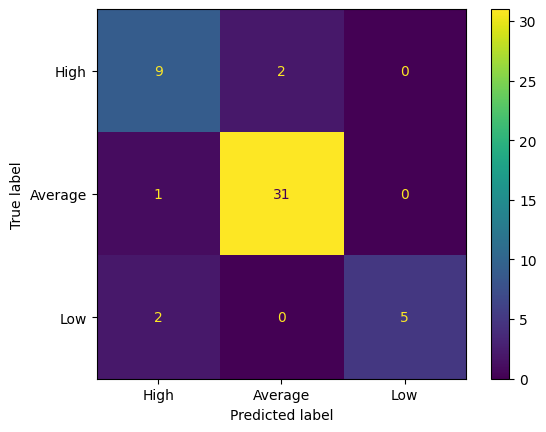

In [22]:
labels=['High','Average','Low']
cmddd=ConfusionMatrixDisplay(matrixxx,display_labels=labels)
cmddd.plot()

In [28]:
#Accuracy Score
score=print('Accuracy score obtained using KNN:',accuracy_score(y_test,y_pred))
score=print('Accuracy score obtained using SVM:',accuracy_score(y_test,y_preddd))

Accuracy score obtained using KNN: 0.88
Accuracy score obtained using SVM: 0.9


In [24]:
#classinfication report


In [25]:
report = print("Classification report using KNN: \n", classification_report (y_test,y_pred))

report = print("Classification report using SVM: \n", classification_report (y_test,y_preddd))

Classification report using KNN: 
               precision    recall  f1-score   support

     Average       0.69      0.82      0.75        11
        High       0.94      0.94      0.94        32
         Low       1.00      0.71      0.83         7

    accuracy                           0.88        50
   macro avg       0.88      0.82      0.84        50
weighted avg       0.89      0.88      0.88        50

Classification report using SVM: 
               precision    recall  f1-score   support

     Average       0.75      0.82      0.78        11
        High       0.94      0.97      0.95        32
         Low       1.00      0.71      0.83         7

    accuracy                           0.90        50
   macro avg       0.90      0.83      0.86        50
weighted avg       0.91      0.90      0.90        50

